![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 2: Filtros media movil / filtro gaussiano
```

###**2.1. Importación de Librerías y creación de la señal de prueba**

* **Librerias a utilizar:**



In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

* **Creacion de una señal con ruido**

In [6]:
fm = 1000
t  = np.arange(0,3,1/fm)
n  = len(t)
p  = 15
amplitud_ruido = 5

ampl  = np.interp(np.linspace(0,p,n), np.arange(0,p), np.random.rand(p)*30)
ruido = amplitud_ruido * np.random.rand(n)

sen_ruidosa = ampl + ruido

* **Mostrando señales generadas:**

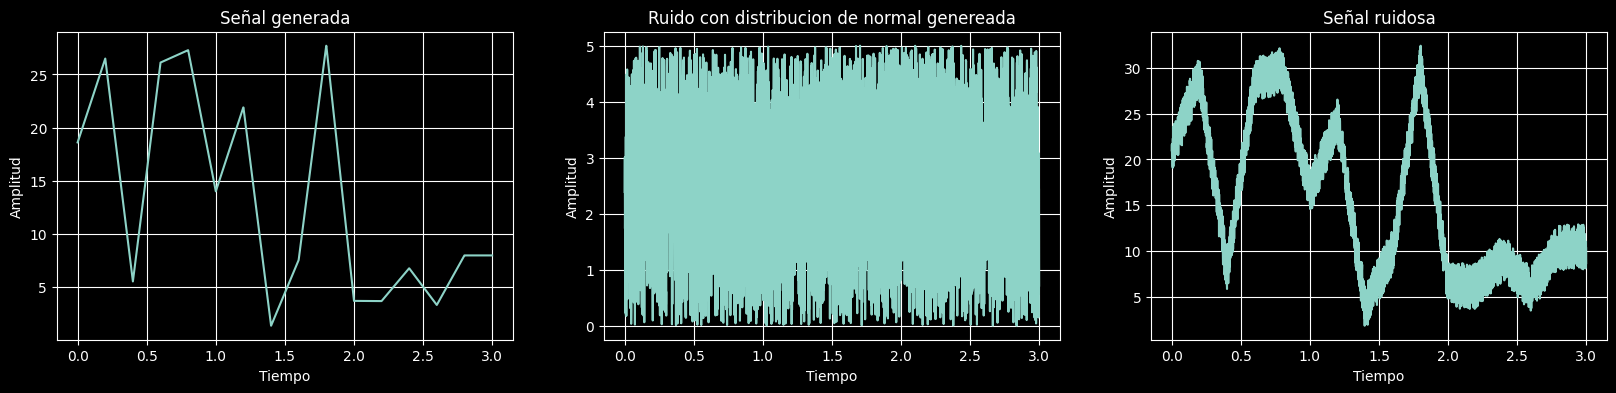

In [10]:
plt.subplots(1,3, figsize = (20,4)),

plt.subplot(131)
plt.plot(t, ampl)
plt.title("Señal generada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(132)
plt.plot(t, ruido)
plt.title("Ruido con distribucion de normal genereada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(133)
plt.plot(t, sen_ruidosa)
plt.title("Señal ruidosa")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)

* **Mas referencias teóricas: **
1. [Media Movil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil)
2. Consultar el libro [2] de la bibliografia del curso en la pagina 38.



* **Aplicación del filtro media movil:**

In [11]:
sen_filtrada = np.zeros(n)

k = 20 #cantidad de muestras al pasado y al futuro 2k+1 = 41
for i in range(k,n-k-1):
  sen_filtrada[i] = np.mean(sen_ruidosa[i-k:i+k])

tam_ventada = 1000 * (k * 2 + 1) / fm

* **Gráficas de los resutados:**

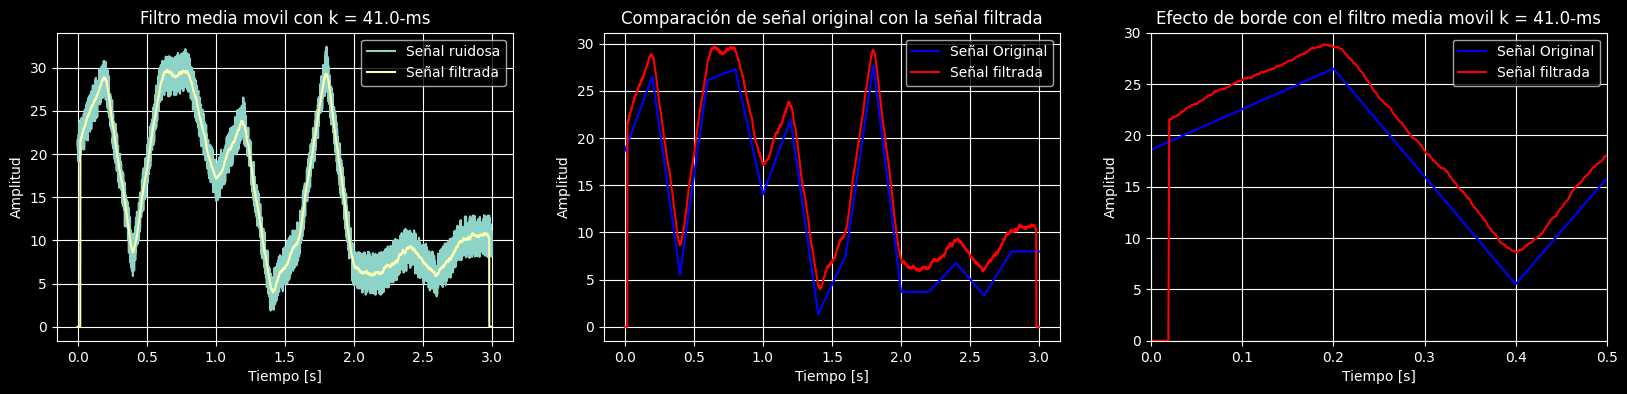

In [12]:
plt.subplots(1,3, figsize = (20,4)),

plt.subplot(131)
plt.plot(t, sen_ruidosa,  label = "Señal ruidosa")
plt.plot(t, sen_filtrada, label = "Señal filtrada")
plt.title(f'Filtro media movil con k = {tam_ventada}-ms')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t, ampl, 'b', label = "Señal Original")
plt.plot(t, sen_filtrada, 'r', label = "Señal filtrada")
plt.title(f'Comparación de señal original con la señal filtrada')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t, ampl, 'b', label = "Señal Original")
plt.plot(t, sen_filtrada, 'r', label = "Señal filtrada")
plt.title(f'Efecto de borde con el filtro media movil k = {tam_ventada}-ms')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.axis([0, 0.5, 0, 30])
plt.grid()
plt.legend()

plt.show()

### **2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)


* **Referencias teoricas:**
1. [Filtro Gaussiano](https://en.wikipedia.org/wiki/Gaussian_filter)

2. [FWHM](https://https://en.wikipedia.org/wiki/Full_width_at_half_maximum#:~:text=In%20a%20distribution%2C%20full%20width,half%20of%20its%20maximum%20value.&text=If%20the%20FWHM%20of%20a,be%20integrated%20by%20simple%20multiplication.)

* **Creación del filtro gaussiano:**

In [20]:
FWHM = 25

k  = 100
gt = 1000 * np.arange(-k,k) / fm

filtro_gaussiano = np.exp(-(4*np.log(2)*gt**2) / FWHM**2)
filtro_gaussiano_normalizado = filtro_gaussiano / np.sum(filtro_gaussiano)

ind_flanco_bajada = k + np.argmin((filtro_gaussiano[k:]-.5)**2)
ind_flanco_subida = np.argmin((filtro_gaussiano-.5)**2)

FWHM_calculado = gt[ind_flanco_subida] - gt[ind_flanco_bajada]

* **Mostrando el filtro gaussiano construido:**

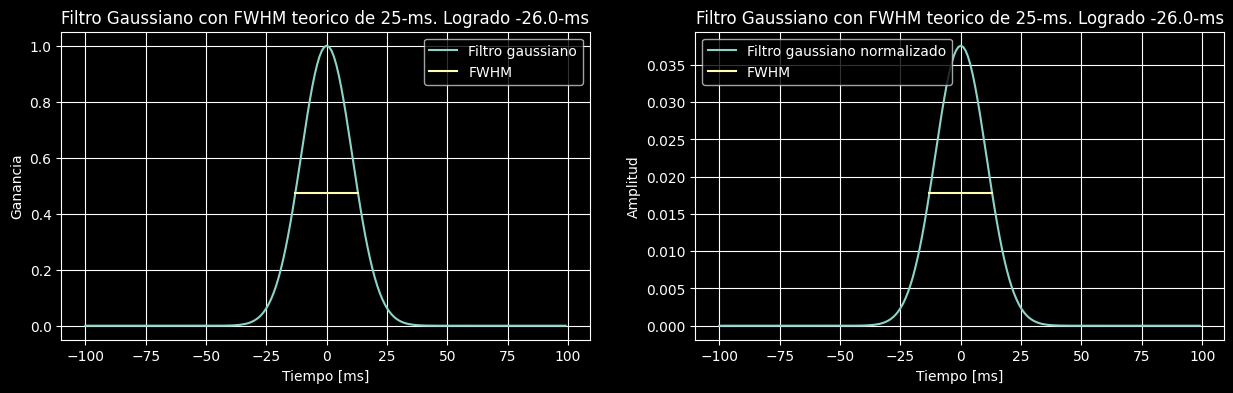

In [21]:
plt.subplots(1,2, figsize = (15,4)),

plt.subplot(121)
plt.plot(gt, filtro_gaussiano,  label = "Filtro gaussiano")
plt.plot([gt[ind_flanco_subida], gt[ind_flanco_bajada]],
         [filtro_gaussiano[ind_flanco_subida], filtro_gaussiano[ind_flanco_bajada]],
         label = "FWHM")
plt.title(f"Filtro Gaussiano con FWHM teorico de {FWHM}-ms. Logrado {FWHM_calculado}-ms")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gt, filtro_gaussiano_normalizado,  label = "Filtro gaussiano normalizado")
plt.plot([gt[ind_flanco_subida], gt[ind_flanco_bajada]],
         [filtro_gaussiano_normalizado[ind_flanco_subida], filtro_gaussiano_normalizado[ind_flanco_bajada]],
         label = "FWHM")
plt.title(f'Filtro Gaussiano con FWHM teorico de {FWHM}-ms. Logrado {FWHM_calculado}-ms')
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.show()

* **Aplicación del filtro Gaussiano:**

In [22]:
sen_filtro_gauss = np.zeros_like(sen_ruidosa)

for i in range(k+1,n-k-1):
  sen_filtro_gauss[i] = np.sum(sen_ruidosa[i-k:i+k]*filtro_gaussiano_normalizado)

* **Mostrando los resultados:**

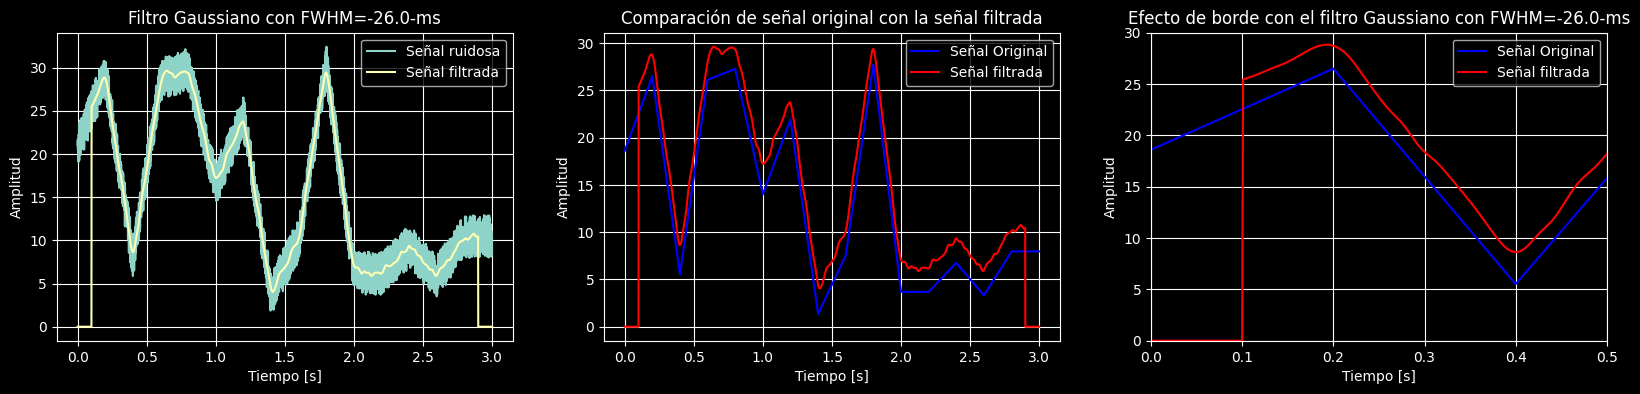

In [23]:
plt.subplots(1,3, figsize = (20,4))

plt.subplot(131)
plt.plot(t, sen_ruidosa,  label = "Señal ruidosa")
plt.plot(t, sen_filtro_gauss, label = "Señal filtrada")
plt.title(f'Filtro Gaussiano con FWHM={FWHM_calculado}-ms')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t, ampl, 'b', label = "Señal Original")
plt.plot(t, sen_filtro_gauss, 'r', label = "Señal filtrada")
plt.title(f'Comparación de señal original con la señal filtrada')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t, ampl, 'b', label = "Señal Original")
plt.plot(t, sen_filtro_gauss, 'r', label = "Señal filtrada")
plt.title(f'Efecto de borde con el filtro Gaussiano con FWHM={FWHM_calculado}-ms')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.axis([0, 0.5, 0, 30])
plt.grid()
plt.legend()

plt.show()